New Project File:

Shell for the CAPTCHA Cracking Challenge


In [44]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import patches as ptc 
import math
import random
from PIL import Image
import os



# Define dictionaries for encoding/decoding
dict1 = {0:'2', 1:'6', 2:'A', 3:'B', 4:'C', 5:'D', 6:'E', 7:'F', 8:'G', 9:'H', 10:'K', 11:'M', 
              12:'N', 13:'P', 14:'R', 15:'S', 16:'T', 17:'U', 18:'V', 19:'X', 20:'Z'}
dict2 = {v: k for k, v in dict1.items()}



allfiles = os.listdir('./traindata/')
files = [f for f in allfiles if os.path.isfile('.' +'/traindata/' + f)] #Filtering only the files.
#random.shuffle(files)
numimages = len(files)

train_images = np.zeros((numimages,250,50))
train_labels = np.zeros((numimages,6,21))
train_numlist = np.zeros((numimages))


for i in range(numimages):
    img = Image.open('./traindata/' + files[i]).convert('L')
    data = np.transpose(np.asarray(img)) / 255
    train_images[i] = data





Define the model.  

Input layer: 280x280 pixel images
Convolutional layers: 4x4 kernel, 8 filters
Dense network 1: 4 outputs (spatial)
Dense network 2: 10 outputs (classification)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 280, 280, 1)]        0         []                            
                                                                                                  
 Convolution (Conv2D)        (None, 280, 280, 4)          68        ['Input[0][0]']               
                                                                                                  
 Flatten (Flatten)           (None, 313600)               0         ['Convolution[0][0]']         
                                                                                                  
 Spatial (Dense)             (None, 4)                    1254404   ['Flatten[0][0]']             
                                                                                              

2023-11-08 15:47:21.517163: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-08 15:47:21.606135: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-08 15:47:21.606392: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

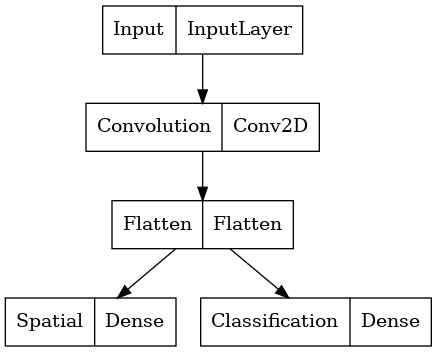

In [3]:


inputlayer = tf.keras.Input(shape=(280, 280,1), name="Input")
convlayer = tf.keras.layers.Conv2D(filters=4, kernel_size=(4,4),padding='same', name="Convolution")(inputlayer)


flatlayer = tf.keras.layers.Flatten(name="Flatten")(convlayer)

spacelayer = tf.keras.layers.Dense(4, activation='relu', name='Spatial')(flatlayer)
classlayer = tf.keras.layers.Dense(10, activation='softmax', name='Classification')(flatlayer)

model = tf.keras.Model(inputs=inputlayer, outputs=[spacelayer, classlayer])


model.summary()

model.compile(
  optimizer=tf.keras.optimizers.Adam(0.001),
  loss={"Spatial": tf.keras.losses.MeanSquaredError(), "Classification": tf.keras.losses.CategoricalCrossentropy()},
  metrics=['accuracy']
  )

tf.keras.utils.plot_model(model, "model.png")

In [35]:
#model.fit(new_train_images, [new_train_labels_space, new_train_labels_class], epochs=100)

#Put code here to load weights



Epoch 1/100
313/313 [==============================] - 3s 8ms/step - loss: 588.1406 - Spatial_loss: 567.5867 - Classification_loss: 20.5540 - Spatial_accuracy: 0.9819 - Classification_accuracy: 0.1509
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 450.8340 - Spatial_loss: 441.6260 - Classification_loss: 9.2080 - Spatial_accuracy: 0.9839 - Classification_accuracy: 0.3230
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 406.2161 - Spatial_loss: 401.0970 - Classification_loss: 5.1193 - Spatial_accuracy: 0.9820 - Classification_accuracy: 0.4701
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 366.0802 - Spatial_loss: 363.0216 - Classification_loss: 3.0587 - Spatial_accuracy: 0.9847 - Classification_accuracy: 0.5977
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 337.6097 - Spatial_loss: 335.7517 - Classification_loss: 1.8581 - Spatial_accuracy: 0.9846 - Classification_accuracy: 0.6950

In [36]:
model.save_weights('myweights1')